### Part-1 Setup and Data Preparation

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.api import ProbPlot, qqplot

In [2]:
df=pd.read_csv(r'E:\Data Science\Upgrad\ML\Simple Linear Regression\Files by Divyanshu\carprices.csv', index_col='car_ID')
df.head()

,symboling,carname,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,two,hatchback,front,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,four,sedan,front,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,four,sedan,front,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
dd=pd.read_csv(r'E:\Data Science\Upgrad\ML\Simple Linear Regression\Files by Divyanshu\carpricesdatadescription.csv', index_col='feature')
dd

,description
feature,
car_ID,unique id of each observation (Integer)
symboling,risk rating (Categorical)
carcompany,name of car company (Categorical)
doornumber,number of doors in a car (Categorical)
carbody,body of car (Categorical)
enginelocation,location of car engine (Categorical)
wheelbase,wheelbase of car (Numeric)
carlength,length of car (Numeric)
carwidth,width of car (Numeric)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   carname           205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   enginelocation    205 non-null    object 
 5   wheelbase         205 non-null    float64
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  cylindernumber    205 non-null    object 
 11  enginesize        205 non-null    int64  
 12  boreratio         205 non-null    float64
 13  stroke            205 non-null    float64
 14  compressionratio  205 non-null    float64
 15  horsepower        205 non-null    int64  
 16  peakrpm           205 non-null    int64  
 1

In [5]:
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns

Index(['carname', 'doornumber', 'carbody', 'enginelocation', 'cylindernumber'], dtype='object')

In [6]:
df[categorical_columns] = df[categorical_columns].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   symboling         205 non-null    int64   
 1   carname           205 non-null    category
 2   doornumber        205 non-null    category
 3   carbody           205 non-null    category
 4   enginelocation    205 non-null    category
 5   wheelbase         205 non-null    float64 
 6   carlength         205 non-null    float64 
 7   carwidth          205 non-null    float64 
 8   carheight         205 non-null    float64 
 9   curbweight        205 non-null    int64   
 10  cylindernumber    205 non-null    category
 11  enginesize        205 non-null    int64   
 12  boreratio         205 non-null    float64 
 13  stroke            205 non-null    float64 
 14  compressionratio  205 non-null    float64 
 15  horsepower        205 non-null    int64   
 16  peakrpm           205 non-

In [7]:
df['symboling'] = df['symboling'].astype('category')

In [8]:
df.drop(labels = 'carname', axis = 1, inplace = True)

In [9]:
df.head()

,symboling,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,
1,3,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,two,hatchback,front,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,four,sedan,front,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,four,sedan,front,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
df.shape

(205, 19)

In [11]:
df = df[['symboling', 'carbody', 'enginelocation', 'carlength', 'carwidth', 'carheight', 'curbweight', 'horsepower', 'citympg', 'highwaympg', 'price']]

In [12]:
df.head()

,symboling,carbody,enginelocation,carlength,carwidth,carheight,curbweight,horsepower,citympg,highwaympg,price
car_ID,,,,,,,,,,,
1,3,convertible,front,168.8,64.1,48.8,2548,111,21,27,13495.0
2,3,convertible,front,168.8,64.1,48.8,2548,111,21,27,16500.0
3,1,hatchback,front,171.2,65.5,52.4,2823,154,19,26,16500.0
4,2,sedan,front,176.6,66.2,54.3,2337,102,24,30,13950.0
5,2,sedan,front,176.6,66.4,54.3,2824,115,18,22,17450.0


In [13]:
categorical_columns = df.select_dtypes(include = 'category').columns

#### EDA Visualizations

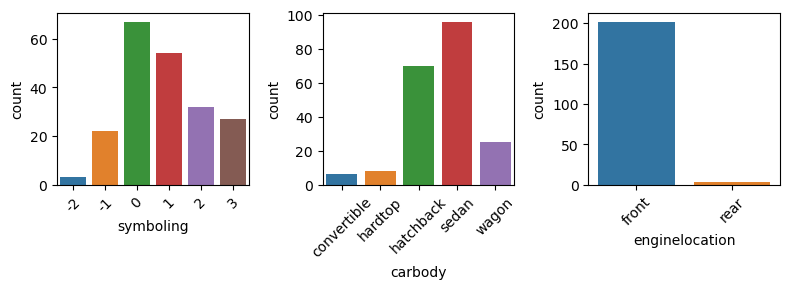

In [14]:
plt.figure(figsize = (8,3))
fignum = 0
for featurename in categorical_columns:
    fignum = fignum + 1
    plt.subplot(1, 3, fignum)
    sns.countplot(x = featurename, data = df)
    plt.xticks(rotation = 45)
    
plt.tight_layout()

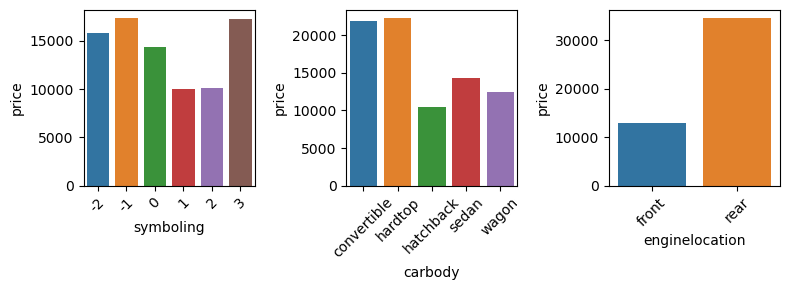

In [15]:
plt.figure(figsize = (8,3))

fignum = 0
for featurename in categorical_columns:
    fignum = fignum + 1
    plt.subplot(1, 3, fignum)
    sns.barplot(x = df[featurename], y = df['price'], ci = None)
    plt.xticks(rotation = 45)

plt.tight_layout()

In [16]:
df.drop(labels = 'enginelocation', axis = 1, inplace = True)

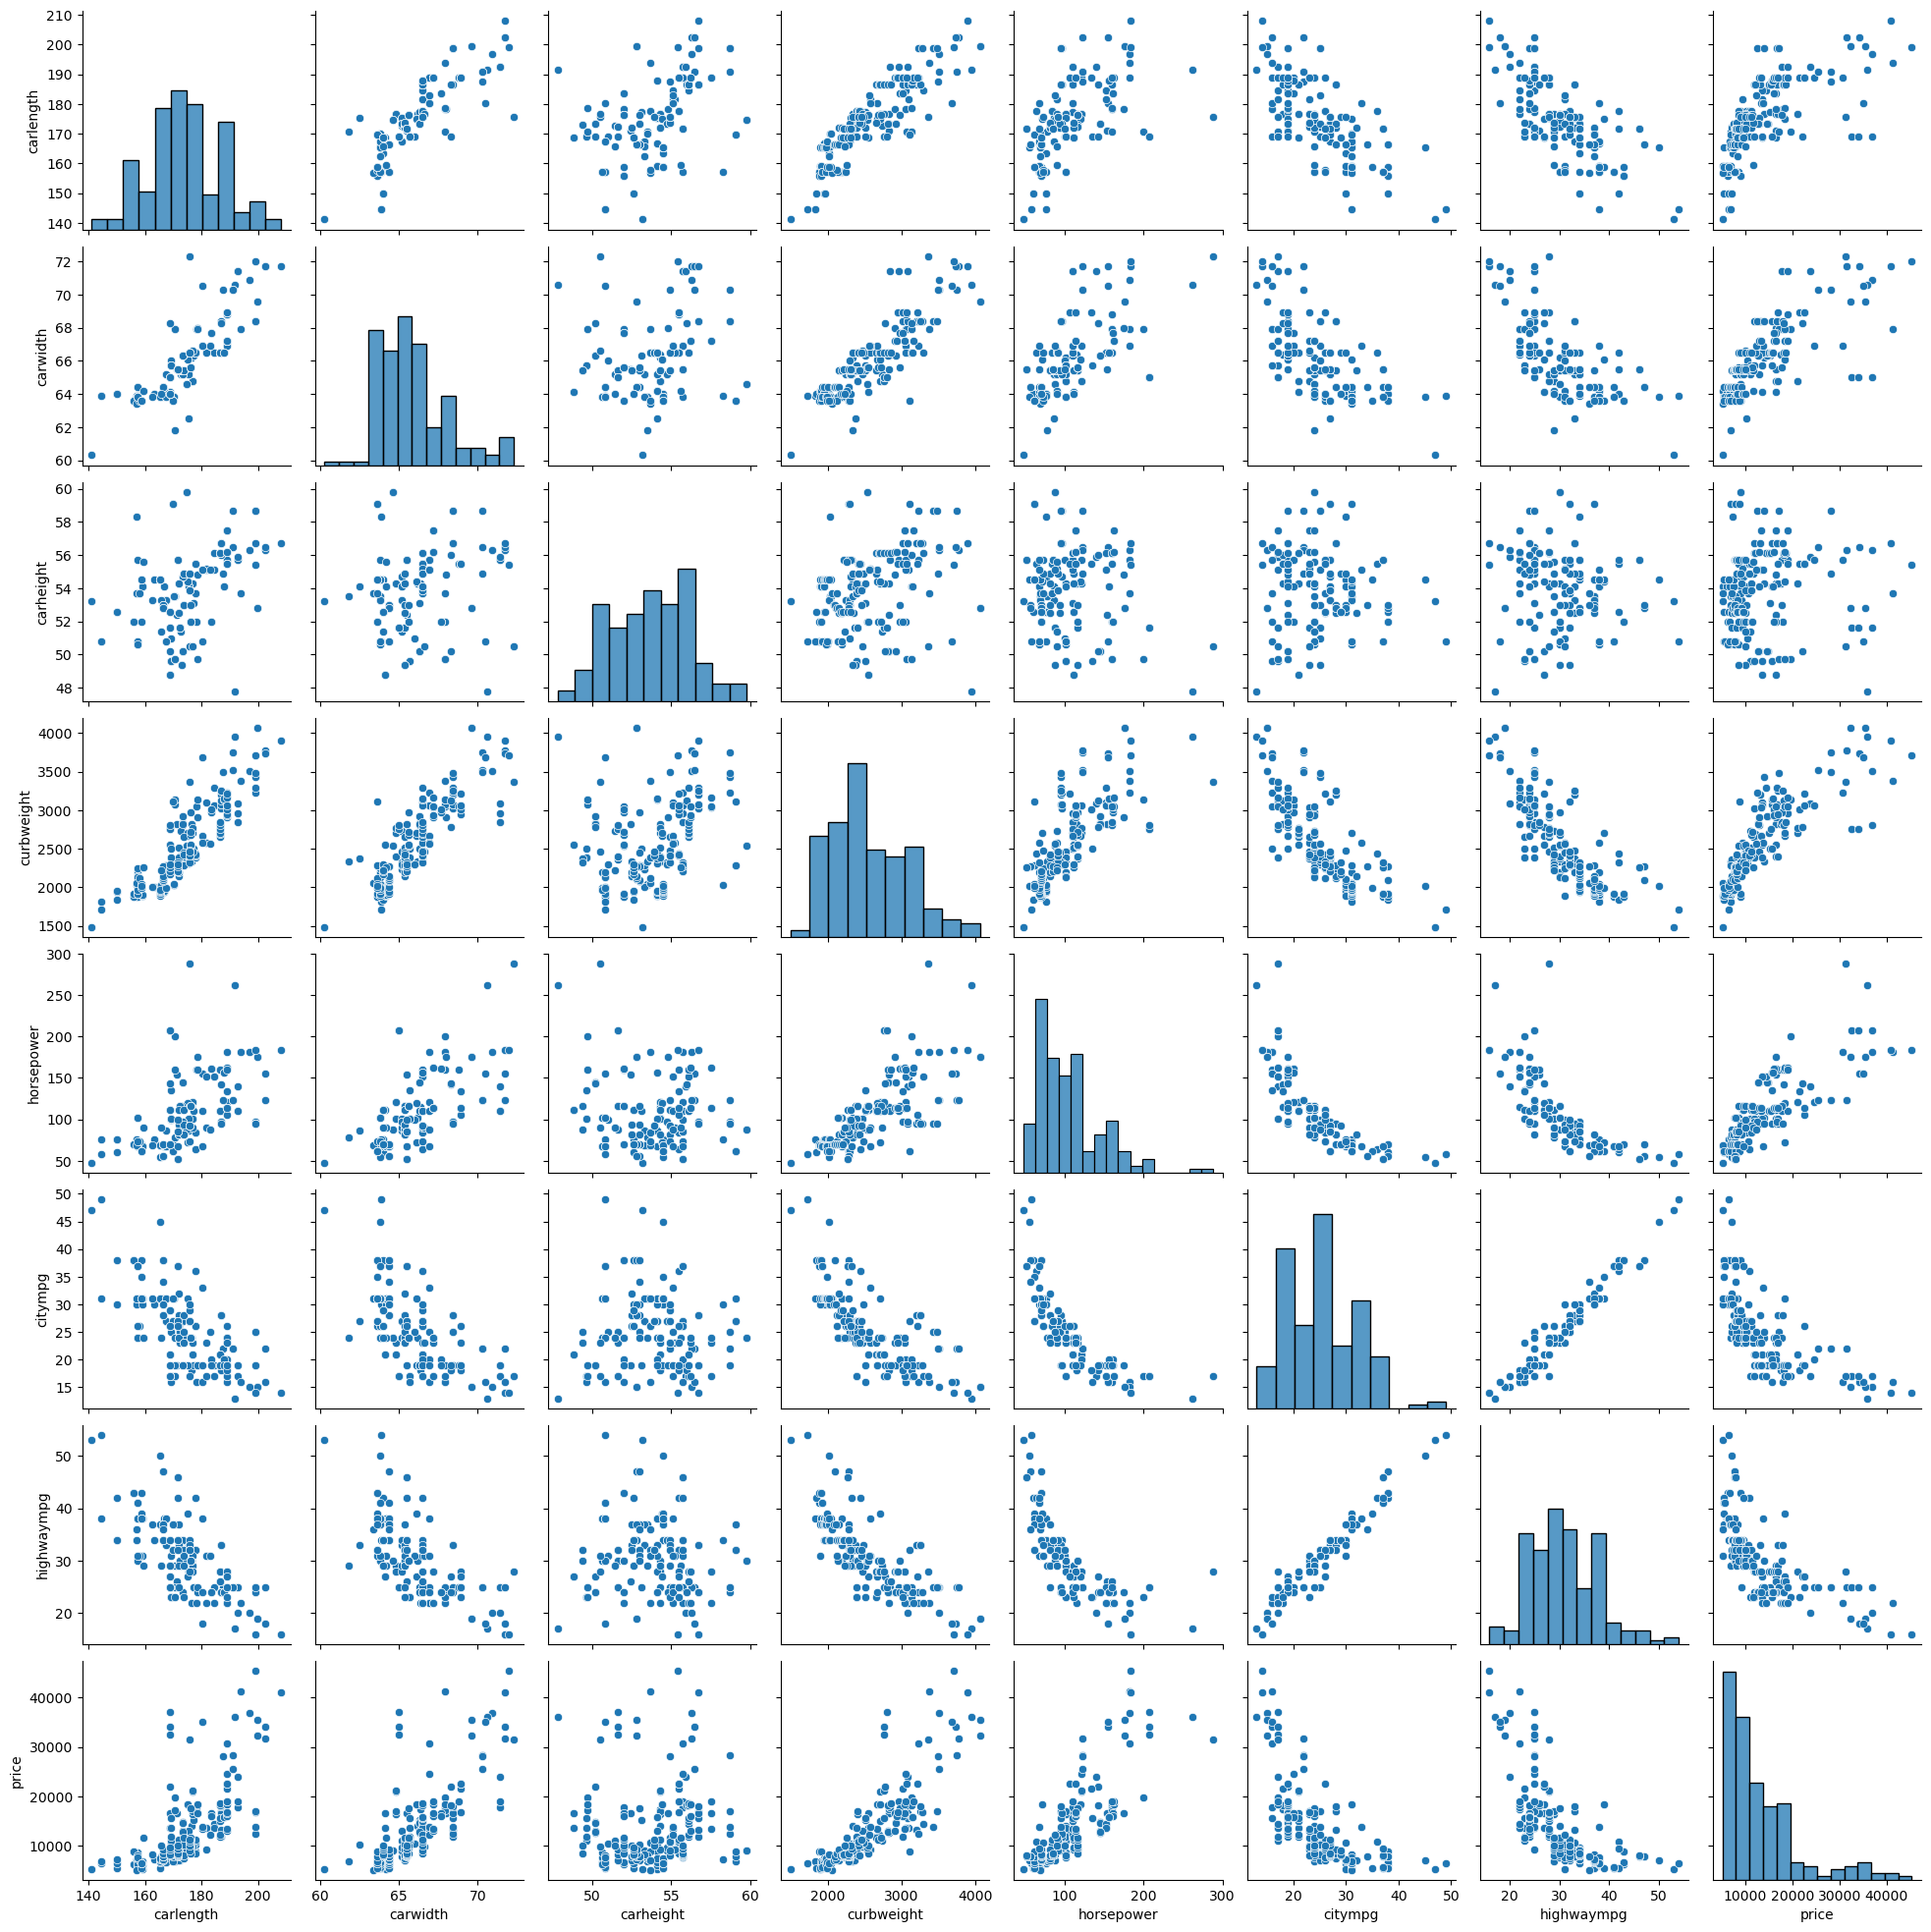

In [17]:
sns.pairplot(df)

<Axes: xlabel='carlength', ylabel='price'>

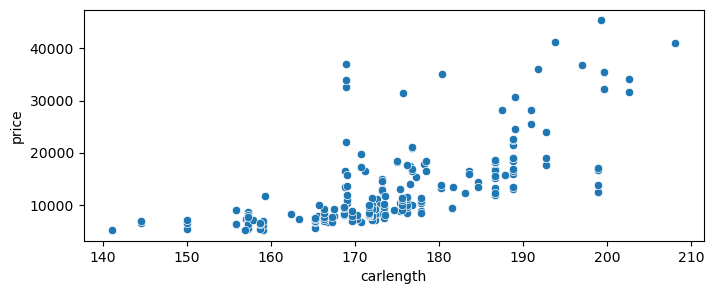

In [18]:
plt.figure(figsize = (8,3))
sns.scatterplot(data = df, x = 'carlength', y = 'price')

<Axes: xlabel='carwidth', ylabel='price'>

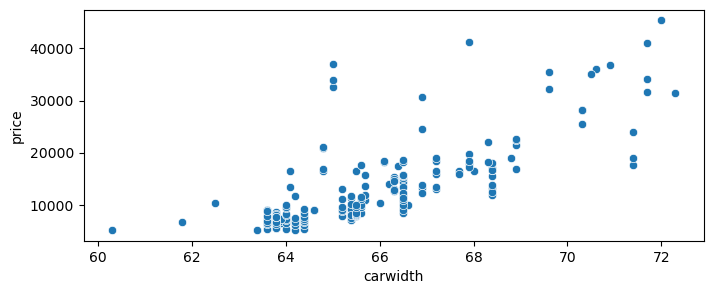

In [19]:
plt.figure(figsize = (8,3))
sns.scatterplot(data = df, x = 'carwidth', y = 'price')

<Axes: xlabel='carheight', ylabel='price'>

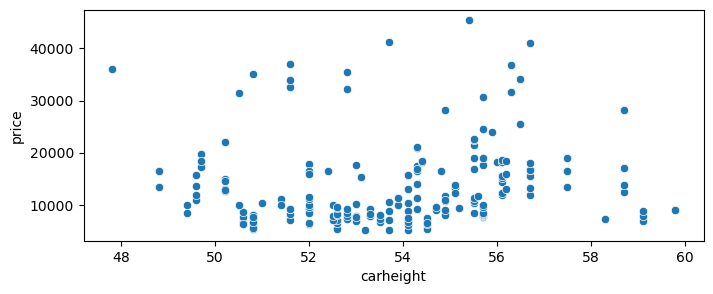

In [20]:
plt.figure(figsize = (8,3))
sns.scatterplot(data = df, x = 'carheight', y = 'price')

<Axes: xlabel='curbweight', ylabel='price'>

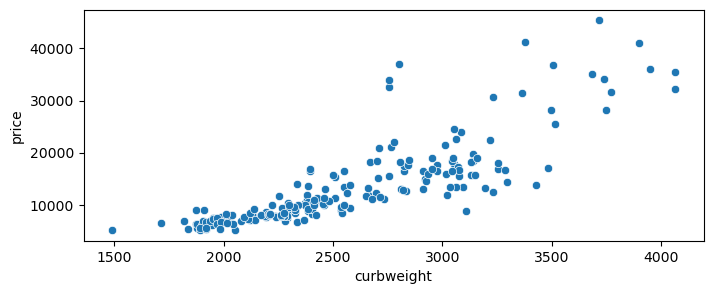

In [21]:
plt.figure(figsize = (8,3))
sns.scatterplot(data = df, x = 'curbweight', y = 'price')

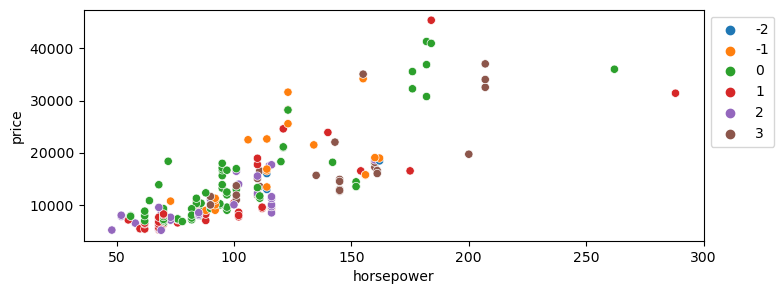

In [22]:
plt.figure(figsize = (8,3))
sns.scatterplot(data = df, x = 'horsepower', y = 'price', hue = 'symboling')
plt.legend(loc = 'best', bbox_to_anchor = (1,1))

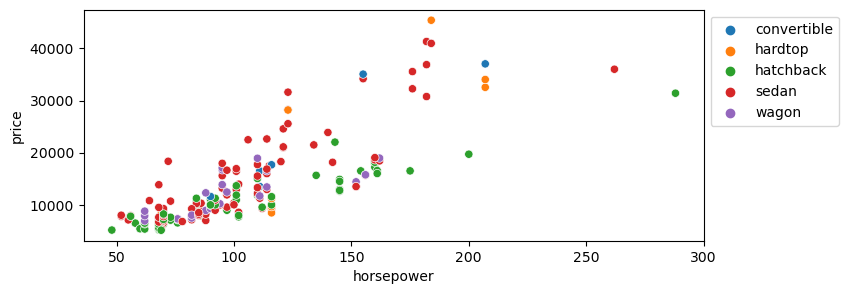

In [23]:
plt.figure(figsize = (8,3))
sns.scatterplot(data = df, x = 'horsepower', y = 'price', hue = 'carbody')
plt.legend(loc = 'best', bbox_to_anchor = (1,1))

<Axes: xlabel='symboling', ylabel='price'>

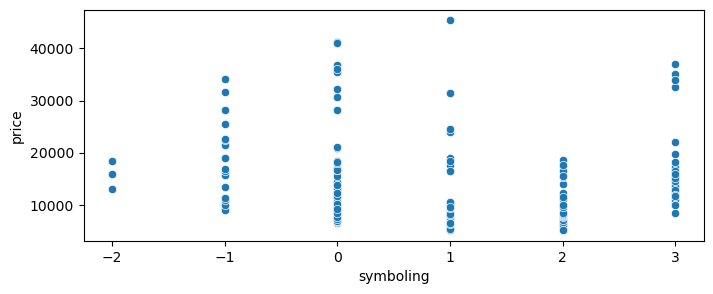

In [24]:
plt.figure(figsize = (8,3))
sns.scatterplot(data = df, x = 'symboling', y = 'price')

In [25]:
pd.pivot_table(data = df, values = 'price', index = 'symboling', columns = 'carbody', aggfunc = 'count', margins = True)

carbody,convertible,hardtop,hatchback,sedan,wagon,All
symboling,,,,,,
-2,0,0,0,3,0,3
-1,0,0,2,13,7,22
0,0,1,8,43,15,67
1,0,1,27,23,3,54
2,1,4,13,14,0,32
3,5,2,20,0,0,27
All,6,8,70,96,25,205


In [26]:
pd.pivot_table(data = df, values = 'price', index = 'symboling', columns = 'carbody', aggfunc = 'mean', margins = True)

carbody,convertible,hardtop,hatchback,sedan,wagon,All
symboling,,,,,,
-2,NaN,NaN,NaN,15781.666667,NaN,15781.666667
-1,NaN,NaN,10618.000000,19178.384615,15817.142857,17330.681818
0,NaN,28176.0,9798.395875,16086.337209,10954.066667,14366.965179
1,NaN,45400.0,9000.388889,9537.760870,11422.666667,10037.907407
2,17669.0,9384.0,7614.384615,12093.214286,NaN,10109.281250
3,22734.8,33278.0,14237.250000,NaN,NaN,17221.296296
All,21890.5,22208.5,10376.652386,14344.270833,12371.960000,13276.710571


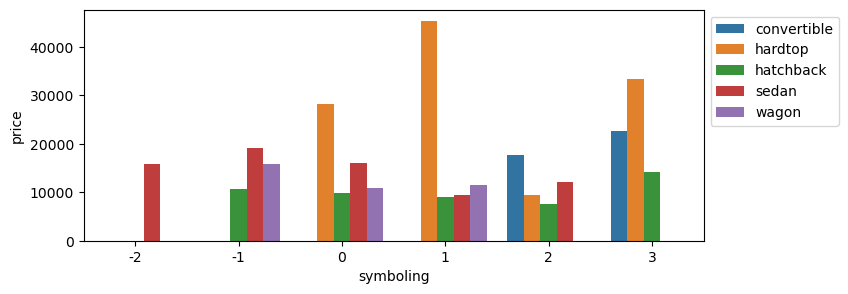

In [27]:
plt.figure(figsize = (8,3))
sns.barplot(data = df, x = 'symboling', y = 'price', hue = 'carbody', ci = None)
plt.legend(loc = 'best', bbox_to_anchor = (1,1))

### Simple Linear Regression Models

In [44]:
lr_model_1 = smf.ols('price ~ carlength', data = df)
lr_model_1 = lr_model_1.fit()
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     177.4
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           1.68e-29
Time:                        18:47:11   Log-Likelihood:                -2068.1
No. Observations:                 205   AIC:                             4140.
Df Residuals:                     203   BIC:                             4147.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.369e+04   5792.793    -10.995      0.0

In [29]:
# Regression plot of this model

<Axes: xlabel='carlength', ylabel='price'>

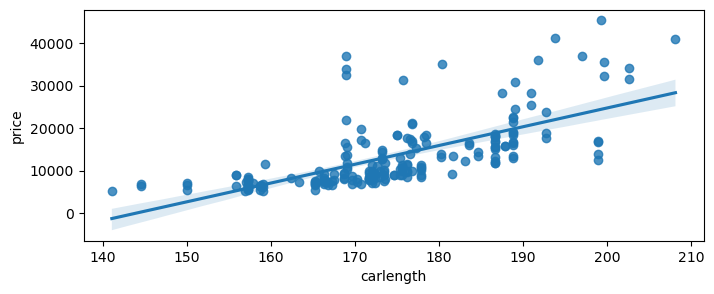

In [30]:
plt.figure(figsize = (8,3))
sns.regplot(data = df, x = 'carlength', y = 'price')

In [31]:
# Residual Standard Error of the model

In [32]:
print(np.round(np.sqrt(np.sum(lr_model_1.resid**2)/lr_model_1.df_resid), 2))

5850.16


Text(0, 0.5, 'Actual values of price')

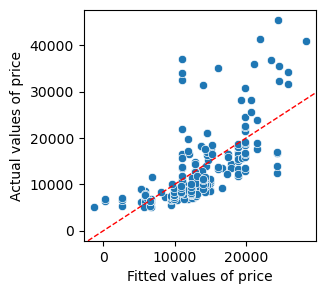

In [34]:
plt.figure(figsize = (3,3))
sns.scatterplot(x = lr_model_1.fittedvalues, y = df['price'])
plt.axline((100,100), slope = 1, linestyle = '--', linewidth = 1, color = 'r')
plt.xlabel('Fitted values of price')
plt.ylabel('Actual values of price')

Text(0, 0.5, 'Standardized Residuals')

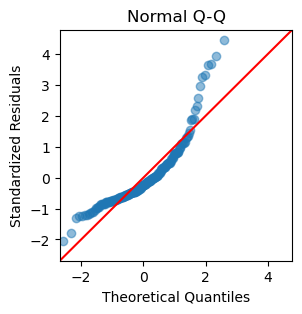

In [35]:
QQ = ProbPlot(lr_model_1.get_influence().resid_studentized_internal)
fig = QQ.qqplot(line = '45', alpha = 0.5, lw = 1)
fig.set_size_inches(3,3)
fig.gca().set_title('Normal Q-Q')
fig.gca().set_xlabel('Theoretical Quantiles')
fig.gca().set_ylabel('Standardized Residuals')

,symboling,carbody,carlength,carwidth,carheight,curbweight,horsepower,citympg,highwaympg,price
car_ID,,,,,,,,,,
1,3,convertible,168.8,64.1,48.8,2548,111,21,27,13495.0
2,3,convertible,168.8,64.1,48.8,2548,111,21,27,16500.0
3,1,hatchback,171.2,65.5,52.4,2823,154,19,26,16500.0
4,2,sedan,176.6,66.2,54.3,2337,102,24,30,13950.0
5,2,sedan,176.6,66.4,54.3,2824,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...
201,-1,sedan,188.8,68.9,55.5,2952,114,23,28,16845.0
202,-1,sedan,188.8,68.8,55.5,3049,160,19,25,19045.0
203,-1,sedan,188.8,68.9,55.5,3012,134,18,23,21485.0


In [51]:
df.to_csv('output.csv', index=False)